In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model
from tools import *

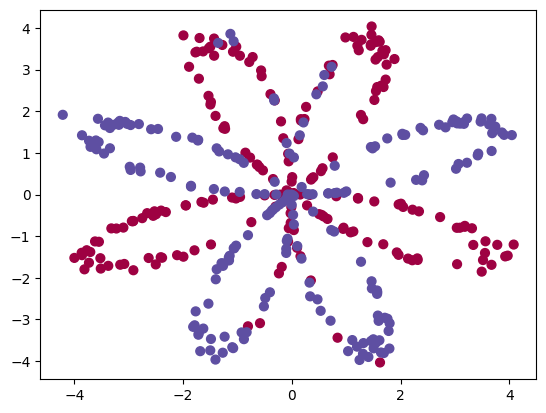

In [3]:


np.random.seed(1)
m = 400 # number of examples
N = int(m/2) # number of points per class
D = 2 # dimensionality
X = np.zeros((m,D)) # data matrix where each row is a single example
Y = np.zeros((m,1), dtype='uint8') # labels vector (0 for red, 1 for blue)
a = 4 # maximum ray of the flower

for j in range(2):
    ix = range(N*j,N*(j+1))
    t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
    r = a*np.sin(4*t) + np.random.randn(N)*0.2 # radius
    X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
    Y[ix] = j
    
X = X.T
Y = Y.T



    


plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral);

(2, 500)
(1, 500)


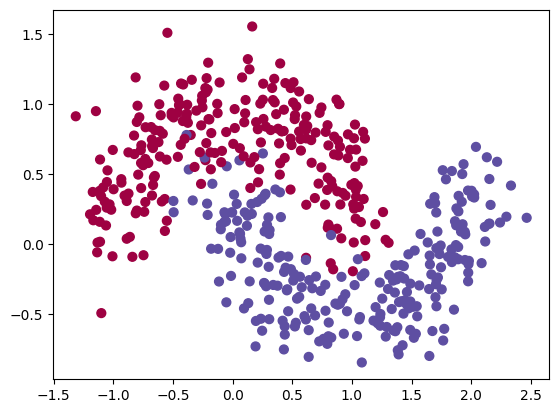

In [4]:
N = 500
noisy_circles = sklearn.datasets.make_circles(n_samples=N, factor=.5, noise=.3)
noisy_moons = sklearn.datasets.make_moons(n_samples=N, noise=.2)
blobs = sklearn.datasets.make_blobs(n_samples=N, random_state=5, n_features=2, centers=6)
gaussian_quantiles = sklearn.datasets.make_gaussian_quantiles(mean=None, cov=0.5, n_samples=N, n_features=2, n_classes=2, shuffle=True, random_state=None)
no_structure = np.random.rand(N, 2), np.random.rand(N, 2)


datasets = {"noisy_circles": noisy_circles,
            "noisy_moons": noisy_moons,
            "blobs": blobs,
            "gaussian_quantiles": gaussian_quantiles}

### START CODE HERE ### (choose your dataset)
dataset = "noisy_moons"
### END CODE HERE ###

X, Y = datasets[dataset]
X, Y = X.T, Y.reshape(1, Y.shape[0])

# make blobs binary
if dataset == "blobs":
    Y = Y%2

# Visualize the data
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral);

print(X.shape)
print(Y.shape)

In [5]:
learning_rate = 1.2
sizes_of_layers = [X.shape[0], 20, 3, 1]
activation = "tanh"
iteration_num = 10000
print_cost = True

L_layer_model_training(X, Y, sizes_of_layers, activation, learning_rate, iteration_num, print_cost)

Cost after iteration 0: 0.6827248432126044
Cost after iteration 100: 0.1515882079737926
Cost after iteration 200: 0.10436440401158759
Cost after iteration 300: 0.10502831740055667
Cost after iteration 400: 0.09783413131513209
Cost after iteration 500: 0.08428079055805378
Cost after iteration 600: 0.07776321791753166
Cost after iteration 700: 0.07310113066073297
Cost after iteration 800: 0.06974891143312767
Cost after iteration 900: 0.06732235512539103
Cost after iteration 1000: 0.06538669994461639
Cost after iteration 1100: 0.06373870896001892
Cost after iteration 1200: 0.06230743439746864
Cost after iteration 1300: 0.06106151628788459
Cost after iteration 1400: 0.05996805956688329
Cost after iteration 1500: 0.05898999117438308
Cost after iteration 1600: 0.058092725759864655
Cost after iteration 1700: 0.057247413500713724
Cost after iteration 1800: 0.05643156235434453
Cost after iteration 1900: 0.05563101494084727
Cost after iteration 2000: 0.05485236060655491
Cost after iteration 2100

{'W1': array([[ 0.7863529 ,  0.06776333],
        [ 3.94007605,  4.03592104],
        [ 0.60255333, -0.28885641],
        [-0.66623384,  0.38974283],
        [-2.42017378,  1.74547704],
        [ 2.04979244, -1.23021205],
        [ 0.78353318, -0.33075235],
        [-0.96625323,  0.31459075],
        [-4.97599909, -1.84333471],
        [ 0.68862882, -0.32912089],
        [ 5.82511463, -2.21940338],
        [ 0.98445802, -0.35545951],
        [-1.76318946,  1.18952939],
        [ 1.88113277, -1.14473178],
        [ 0.84237732, -0.55497907],
        [-4.15474605,  2.71031254],
        [ 0.9002603 , -0.20142624],
        [-6.43028033,  0.56679482],
        [ 0.7681974 ,  1.08366433],
        [ 2.37873663,  5.18406926]]),
 'b1': array([[-0.87060188],
        [-2.23021578],
        [-0.45004834],
        [ 0.53528975],
        [ 2.53206157],
        [ 0.17579993],
        [-0.83199143],
        [ 1.13465224],
        [-1.90303412],
        [-0.62965778],
        [-1.08364854],
        [-1.1

In [6]:

def predict_boundary(x, activation):
    assert x.shape[0] == 2, "The input must be a 2D array"

    parameters = load_parameters("parameters.h5")

    caches = forward_porpogate(x, parameters, activation)

    AL, WL, bL, ZL, A = caches[-1]

    y_output = AL

    if y_output < 0.5:
        y_final = 0
    else:
        y_final = 1

    return y_final


def plot_decision_boundary(model, X, Y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=Y, cmap=plt.cm.Spectral)


plot_decision_boundary(lambda x: predict_boundary(x.T, activation), X, Y)
